Given data like this, how can we learn to predict the prices of other houses in Portland, as a function of the size of their living areas?
To establish notation for future use, we’ll use $x^{(i)}$ to denote the “input”
variables (living area in this example), also called input features, and $y^{(i)}$
to denote the “output” or target variable that we are trying to predict
(price). A pair $(x^{(i)} , y^{(i)} )$ is called a training example, and the dataset
that we’ll be using to learn—a list of m training examples ${(x^{(i)} , y^{(i)} ); i =
1, . . . , m}$—is called a training set. Note that the superscript “(i)” in the
notation is simply an index into the training set, and has nothing to do with
exponentiation. We will also use $X$ denote the space of input values, and $Y$
the space of output values.

To describe the supervised learning problem slightly more formally, our
goal is, given a training set, to learn a function $h:X\in Y$ so that $h(x)$ is a
“good” predictor for the corresponding value of y. For historical reasons, this
function h is called a hypothesis. Seen pictorially, the process is therefore
like this:
<img src='../images/hypothesis.png' width='300' alt=''>

When the target variable that we’re trying to predict is continuous, such
as in our housing example, we call the learning problem a regression prob-
lem. When y can take on only a small number of discrete values (such as
if, given the living area, we wanted to predict if a dwelling is a house or an
apartment, say), we call it a classification problem.

To perform supervised learning, we must decide how we’re going to rep-
resent functions/hypotheses h in a computer. As an initial choice, let’s say
we decide to approximate $y$ as a linear function of $x$:

$$h_{\theta} = \theta_0 + \theta_1x$$

Here, the $θ_i’s$ are the parameters (also called weights) parameterizing the
space of linear functions mapping from $X$ to $Y$. When there is no risk of
confusion, we will drop the $\theta$ subscript in $h_{\theta}(x)$, and write it more simply as
$h(x)$. To simplify our notation, we also introduce the convention of letting
$x_0 = 1$ (this is the intercept term), so that

$$h(x) = \sum_{i=1}^m \theta_ix_i = \theta^Tx$$

where on the right-hand side above we are viewing $\theta$ and $x$ both as vectors,
and here $n$ is the number of input variables (not counting $x_0$). Now, given a training set, how do we pick, or learn, the parameters $\theta$? One reasonable method seems to be to make $h(x)$ close to $y$, at least for the training examples we have. To formalize this, we will define a function that measures, for each value of the $θ’s$, how close the $h(x^{(i)})$'s are to the corresponding $y^{(i)}$'s. We define the cost or loss function $L(h({x}),y)$, is some measure of prediction error. There are many types of loss functions.
* L1-norm: $L(h({x}),y) = \|h({x}) - y\|_1$ -- city block distance -- lasso
* L2-norm: $L(h({x}),y) = \|h({x}) - y\|_2$ -- just the euclidian -- ridge
* p-norm: $L(h({x}),y) = \|h({x}) - y\|_p$ -- more generally speaking
* Square-error: $L(h({x}),y) = \|h({x}) - y\|_2^2$ -- used in linear regression and logistic regression
* Hinge-loss: $L(h({x}),y) = \text{max}(0,1-yh({x}))$ -- used in SVMs for classification.
* Exponential-loss: $L(h({x}),y) = e^{-yh({x})}$ -- used in adaboost for classification

The loss function is equal to the negated conditional log-likelihood
\begin{align*}
L(h({x}),y) &= - \log p(\mathcal{D}|{w})\\
&= - \sum_m \log p(y_m|{x}_m,{w})
\end{align*}

Given some data, we can approximate the expected risk with the empirical risk given by
\begin{align*}
R_{\mathcal{D}}(h) &= \frac{1}{m} \sum_m L(h({x}_m),y_m)
\end{align*}
Also, with infinite data, empirical risk is the expected risk
\begin{align*}
\lim_{m \to \infty} R_{\mathcal{D}}(h) &= R(h)
\end{align*}

This gives us an empirical risk (or cross-entropy) of
\begin{align*}
R_{\mathcal{D}}(h) = \frac{1}{m} \sum_m \|y_m - h({x})\|_2^2
\end{align*}
In this case, empirical risk is often referred to as the residual-sum-of-squares (RSS) or mean-square-error (MSE). The cost function used here defined as:

$$J(\theta) = \frac{1}{2m}\sum_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)})^2$$

We want to choose $\theta$ so as to minimize $J(\theta)$. To do so, let’s use a search
algorithm that starts with some “initial guess” for $\theta$, and that repeatedly
changes $\theta$ to make $J(\theta)$ smaller, until hopefully we converge to a value of
$\theta$ that minimizes $J(\theta)$. Specifically, let’s consider the gradient descent
algorithm, which starts with some initial $\theta$, and repeatedly performs the
update:

$$\theta_j = \theta_j - \alpha \frac{\partial}{\partial{\theta_{j}}}J(\theta)$$


(This update is simultaneously performed for all values of $j = 0, . . . , n.$)
Here, $\alpha$ is called the learning rate. This is a very natural algorithm that
repeatedly takes a step in the direction of steepest decrease of $J$.
In order to implement this algorithm, we have to work out what is the
partial derivative term on the right hand side. Let’s first work it out for the
case of if we have only one training example $(x, y)$, so that we can neglect
the sum in the definition of $J$. We have:
\begin{align}
\frac{\partial}{\partial{\theta_{j}}}J(\theta) &= \frac{\partial}{\partial{\theta_{j}}}\frac{1}{2}(h_{\theta}(x)-y)^2\\
&= 2.\frac{1}{2}(h_{\theta}(x)-y)\frac{\partial}{\partial{\theta_{j}}}(h_{\theta}(x)-y)\\
&= (h_{\theta}(x)-y)\frac{\partial}{\partial{\theta_{j}}}(\sum_{i=0}^{n}\theta_i x_i-y)\\
&= (h_{\theta}(x)-y)x_j
\end{align}

Using the rule for a single training example, we derive the gradient descent algorithm for linear regression:

\begin{align}
repeat \{\\
&\theta_j = \theta_j - \alpha \frac{1}{m}\sum_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)}).x^{(i)}_j\\
\}
\end{align}

Simultaneously update all values of $j = 0, . . . , n.$

#### Regularization
One problem that frequently occures in linear regression is overfitting. The standard solution for previnting overfitting is regularization. Since we know that the empirical risk will underestimate the true risk, add a penalty to complex functions $h$ to try to compensate for this. Then, instead of doing
$$
min_h R_D(h) = E\big[L(h({x}_n),y_n)\big]
$$

we can do
$$
min_h R_D(h) + \lambda h(\theta)
$$
Notice that we can rephrase this unconstrained linear optimization as an constrained optimization. For any given $\lambda$ there is a $c$ such that the same solution can be obtained from
$$
min_f R_D(h) \\
s.t.\;\;\;h(\theta) \le c
$$

**The Lasso estimator** is useful to impose sparsity on the coefficients. In other words, it is to be prefered if we believe that many of the features are not relevant.

$$\hat{\theta}_{lasso} = \text{argmin}_{\theta}\left\{\frac{1}{2}\sum_{i=1}^N (y_i - \sum_{j=0}^k x_{ij} \theta_j)^2 + \lambda \sum_{j=1}^k |\theta_j| \right\}$$

The **ridge estimator** is a simple, computationally efficient regularization for linear regression.

$$\hat{\theta}_{ridge} = \text{argmin}_{\theta}\left\{\sum_{i=1}^N (y_i - \sum_{j=0}^k x_{ij} \theta_j)^2 + \lambda \sum_{j=1}^k \theta_j^2 \right\}$$

**ElasticNet** is a compromise between lasso and ridge regression.

$$\hat{\theta}_{elastic} = \text{argmin}_{\theta}\left\{\frac{1}{2}\sum_{i=1}^N (y_i - \sum_{j=0}^k x_{ij} \theta_j)^2 + (1 - \alpha) \sum_{j=1}^k \theta^2_j + \alpha \sum_{j=1}^k |\theta_j| \right\}$$


### Normal equation
Method of solve for $\theta$ analytically. Intuition: Given a training set ${(x^{(i)} , y^{(i)} ); i =
1, . . . , m}$, We know the cost function for linear regression is
    
$$J(\theta) = \frac{1}{2}\sum_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)})^2 = \frac{1}{2}(X\theta-\hat{y})^T(X\theta-\hat{y})$$

\begin{align*}
\nabla_{\theta}J(\theta) &= \nabla_{\theta} \frac{1}{2}(X\theta-\hat{y})^T(X\theta-\hat{y})\\
&= \frac{1}{2} \nabla_{\theta} (\theta^T X^T X\theta - \theta^TX^T\hat{y} - \hat{y}^TX\theta + \hat{y}^T\hat{y}) \\&= \frac{1}{2} \nabla_{\theta} \;{tr}(\theta^T X^T X\theta - \theta^TX^T\hat{y} - \hat{y}X\theta + \hat{y}^T\hat{y}) \\
&= \frac{1}{2} \nabla_{\theta} ({tr}(\theta^T X^T X\theta) - 2{tr}(\hat{y}^T X\theta)) \\
&= \frac{1}{2} \nabla_{\theta} (X^TX\theta + X^TX\theta - 2 X^T\hat{y}) \\
&= (X^TX\theta - X^T\hat{y}) \\
0 &= (X^TX\theta - X^T\hat{y}) \\
X^TX\theta &= X^T\hat{y}\\
\therefore \theta &= (X^TX)^{-1}X^T\hat{y}
\end{align*}

The value of $\theta$ that minimize $J(\theta)$ is given by the closed form equation above.

## Tensorflow implementation

In [64]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('../exercise/ex1/data/ex1data1.txt', sep=",", header=None)
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


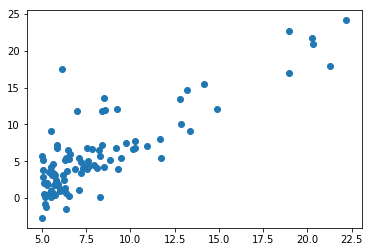

In [65]:
plt.scatter(data[0], data[1])
plt.show()

### Feature Normalization
Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual feature do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).
#### Z-score normalization
The result of **standardization** (or **Z-score normalization**) is that the features will be rescaled so that they'll have the properties of a standard normal distribution with $\mu = 0$ and $\sigma = 1$, where $\mu$ is the mean (average) and $\sigma$ is the standard deviation from the mean; standard scores (also called ***z*** scores) of the samples are calculated as follows:

\begin{equation} z = \frac{x - \mu}{\sigma}\end{equation} 

#### Min-Max scaling
Standardizing the features so that they are centered around 0 with a standard deviation of 1 is not only important if we are comparing measurements that have different units, but it is also a general requirement for many machine learning algorithms. An alternative approach to Z-score normalization (or standardization) is the so-called **Min-Max scaling** (often also simply called "normalization" - a common cause for ambiguities). In this approach, the data is scaled to a fixed range - usually 0 to 1. The cost of having this bounded range - in contrast to standardization - is that we will end up with smaller standard deviations, which can suppress the effect of outliers.

A Min-Max scaling is typically done via the following equation:

\begin{equation} X_{norm} = \frac{X - X_{min}}{X_{max}-X_{min}} \end{equation}

In [66]:
def z_score_normalize(X):
    X = (X - X.mean()) / X.std()
    
    return X

\begin{align*}
h_{\theta} = y_{predicted} = {w}^T{x}
\end{align*}
\begin{align*}
J(\theta) = \frac{1}{2m} \sum_{i=1}^m (y_i - y_{predicted})^2
\end{align*}
Here, $\theta=w$

In [67]:
learning_rate = 0.01
epochs = 100

d_norm = z_score_normalize(data)
train_X = d_norm[0]
train_Y = d_norm[1]

n_samples = data.shape[0]

In [68]:
X = tf.placeholder(tf.float32, name= 'X')
Y = tf.placeholder(tf.float32, name= 'Y')

W = tf.Variable(np.random.normal(), name='weight')
b = tf.Variable(np.random.normal(), name='bias')


$$\theta_j = \theta_j - \alpha \frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)}).x^{(i)}_j$$

In [69]:
pred = tf.add(tf.multiply(X, W), b)

cost = tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * n_samples)

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

Traning cost= 0.19458192586898804, weight= 0.5376732349395752, bias= 0.07124785333871841


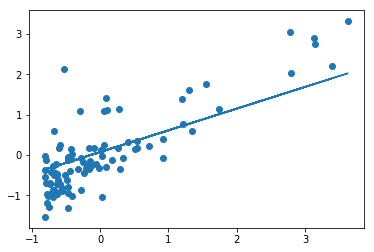

In [73]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        sess.run(optimizer, feed_dict={X: train_X, Y: train_Y})
    
    traning_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    weight = sess.run(W)
    bias = sess.run(b)
    print('Traning cost= {}, weight= {}, bias= {}'.format(traning_cost, weight, bias))
    
    plt.scatter(train_X, train_Y, label='Normalized data')
    plt.plot(train_X, weight * train_X + bias, label='Fitted line')
    plt.show()